###  Create a Support Vector Machine regressor to predict wine quality from profile of chemical attributes of the wine.

In [1]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np
import os
# from os import listdir
# from os.path import isfile, join
# from os import system
# from os.path import isfile, join

##### Example SciKit SVR Regressors

  + https://www.programcreek.com/python/example/75189/sklearn.svm.SVR
  + https://github.com/drabastomek/practicalDataAnalysisCookbook/tree/master/Codes/Chapter06
  + https://github.com/drabastomek/practicalDataAnalysisCookbook/blob/master/Codes/Chapter06/regression_svm_alternative.py

##### White wine source data set

In [2]:
white_datafile = os.path.join("..", "data", "sourcedata", "winequality-white.csv")
print(white_datafile)

# os.system('ls')
# os.listdir()
# #ls "..\data\sourcedata\"
# #ls sourcefile

white_df = pd.read_csv(white_datafile, delimiter=";")
white_df.sort_values(by=['quality'], ascending=False)

..\data\sourcedata\winequality-white.csv


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
827,7.4,0.24,0.36,2.00,0.031,27.0,139.0,0.99055,3.28,0.48,12.5,9
1605,7.1,0.26,0.49,2.20,0.032,31.0,113.0,0.99030,3.37,0.42,12.9,9
876,6.9,0.36,0.34,4.20,0.018,57.0,119.0,0.98980,3.28,0.36,12.7,9
774,9.1,0.27,0.45,10.60,0.035,28.0,124.0,0.99700,3.20,0.46,10.4,9
820,6.6,0.36,0.29,1.60,0.021,24.0,85.0,0.98965,3.41,0.61,12.4,9
...,...,...,...,...,...,...,...,...,...,...,...,...
1484,7.5,0.32,0.24,4.60,0.053,8.0,134.0,0.99580,3.14,0.50,9.1,3
2373,7.6,0.48,0.37,1.20,0.034,5.0,57.0,0.99256,3.05,0.54,10.4,3
251,8.5,0.26,0.21,16.20,0.074,41.0,197.0,0.99800,3.02,0.50,9.8,3
1688,6.7,0.25,0.26,1.55,0.041,118.5,216.0,0.99490,3.55,0.63,9.4,3


In [3]:
# red_datafile = os.path.join("..", "data", "sourcedata", "winequality-red.csv")
# print(sourcefile)

# red_df = pd.read_csv(red_datafile, delimiter=";")
# red_df.head()

##### Set the target attribute (y axis)

In [4]:
y = white_df["quality"].values.reshape(-1,1)
y
# Using SVM as a regression and NOT a clasifier so we won;t be declaring target class names 
# target_names = ["negative", "positive"]

array([[6],
       [6],
       [6],
       ...,
       [6],
       [7],
       [6]], dtype=int64)

###### drop the target (quality) column from data to have dataeframe of just the attributes we are regressing

In [5]:
X = white_df.drop("quality", axis=1)
feature_names = X.columns
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


###### split the training and testing data

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [7]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3673, 11)
(3673, 1)
(1225, 11)
(1225, 1)


#### Scale the data

In [8]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [9]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)


#### plot the scaled data for a few feature attributes just to see

In [10]:
i=0;
for feature in feature_names :
    print(f"[{i}] {feature}")
    i = i+1
      

[0] fixed acidity
[1] volatile acidity
[2] citric acid
[3] residual sugar
[4] chlorides
[5] free sulfur dioxide
[6] total sulfur dioxide
[7] density
[8] pH
[9] sulphates
[10] alcohol


##### Fixed Aciidty vs Quality scaled data plot

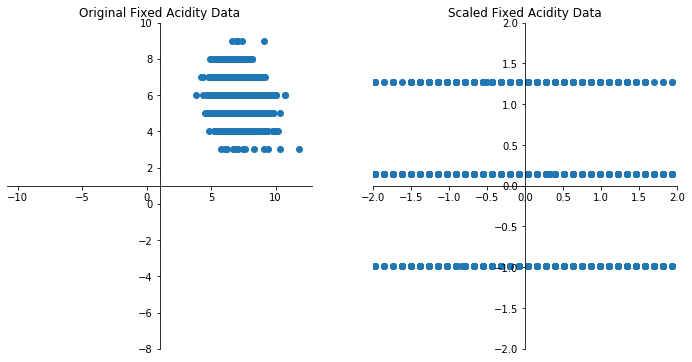

In [11]:
fig1 = plt.figure(figsize=(12, 6))
axes1 = fig1.add_subplot(1, 2, 1)
axes2 = fig1.add_subplot(1, 2, 2)

axes1.set_title("Original Fixed Acidity Data")
axes2.set_title("Scaled Fixed Acidity Data")

maxx = X_train["fixed acidity"].max()
maxy = y_train.max()
axes1.set_xlim(-maxx + 1, maxx + 1)
axes1.set_ylim(-maxy + 1, maxy + 1)

axes2.set_xlim(-2, 2)
axes2.set_ylim(-2, 2)

def set_axes(ax):
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
set_axes(axes1)
set_axes(axes2)

axes1.scatter(X_train["fixed acidity"], y_train)
axes2.scatter(X_train_scaled[:,0], y_train_scaled[:])

##### Alcohol vs Quality scaled data plot

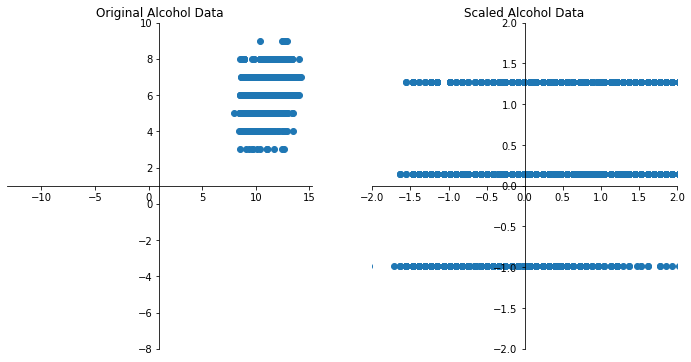

In [12]:
fig2 = plt.figure(figsize=(12, 6))
axes21 = fig2.add_subplot(1, 2, 1)
axes22 = fig2.add_subplot(1, 2, 2)

axes21.set_title("Original Alcohol Data")
axes22.set_title("Scaled Alcohol Data")

maxx = X_train["alcohol"].max()
maxy = y_train.max()
axes21.set_xlim(-maxx + 1, maxx + 1)
axes21.set_ylim(-maxy + 1, maxy + 1)

axes22.set_xlim(-2, 2)
axes22.set_ylim(-2, 2)
    
set_axes(axes21)
set_axes(axes22)

axes21.scatter(X_train["alcohol"], y_train)
axes22.scatter(X_train_scaled[:,10], y_train_scaled[:])

##### Citrc Acid vs Quality scaled data plot

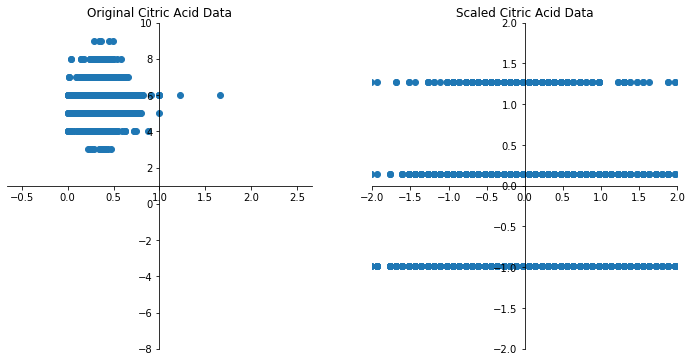

In [13]:
fig3 = plt.figure(figsize=(12, 6))
axes31 = fig3.add_subplot(1, 2, 1)
axes32 = fig3.add_subplot(1, 2, 2)

axes31.set_title("Original Citric Acid Data")
axes32.set_title("Scaled Citric Acid Data")

maxx = X_train["citric acid"].max()
maxy = y_train.max()
axes31.set_xlim(-maxx + 1, maxx + 1)
axes31.set_ylim(-maxy + 1, maxy + 1)

axes32.set_xlim(-2, 2)
axes32.set_ylim(-2, 2)
    
set_axes(axes31)
set_axes(axes32)

axes31.scatter(X_train["citric acid"], y_train)
axes32.scatter(X_train_scaled[:,2], y_train_scaled[:])

##### Residual Sugar vs Quality scaled data plot

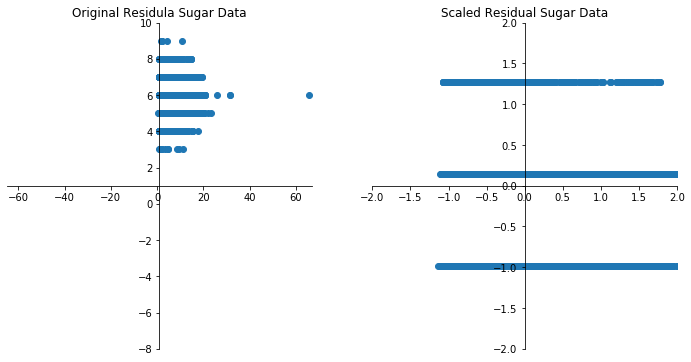

In [14]:
fig4 = plt.figure(figsize=(12, 6))
axes41 = fig4.add_subplot(1, 2, 1)
axes42 = fig4.add_subplot(1, 2, 2)

axes41.set_title("Original Residula Sugar Data")
axes42.set_title("Scaled Residual Sugar Data")

maxx = X_train["residual sugar"].max()
maxy = y_train.max()
axes41.set_xlim(-maxx + 1, maxx + 1)
axes41.set_ylim(-maxy + 1, maxy + 1)

axes42.set_xlim(-2, 2)
axes42.set_ylim(-2, 2)
    
set_axes(axes41)
set_axes(axes42)

axes41.scatter(X_train["residual sugar"], y_train)
axes42.scatter(X_train_scaled[:,3], y_train_scaled[:])

### Train (fit) various regression models

In [15]:
# # Support vector machine linear classifier
# # from sklearn.svm import SVC 
# # model = SVC(kernel='linear')

# #from sklearn.svm import SVR
# # model = SVR(kernel='rbf', C=0.1 * logC, gamma=0.1 * logGamma)
# # model = SVR(kernel='rbf', C=0.1, gamma=0.1) ## R2 = 0.13
# model = SVR() ## R2 = 0.38, MSE = 0.60
# #model = SVR(kernel='linear') ## R2 = 0.25, MSE = 0.58
# #model = LinearRegression() ## R2 = 0.27, MSE = 0.56
# model.fit(X_train_scaled, np.ravel(y_train_scaled))

In [16]:
#np.ravel(y_train_scaled).shape

##### Use  model metrics appropriate for Regression Models
  + note - "accuracy" is for classifiers 
  + need different metrics for a regressor
  + r-squared is default scoring for many sklearn modles (results of model.score)
  + mean-squared error (MSE).  
  + Good MSE is close to 0.  Good R2 is close to 1

In [17]:
# model.score(X_test_scaled, y_test_scaled)

In [18]:
# # Score the prediction with mse and r2
# predicted_scaled = model.predict(X_test_scaled)

# mse = mean_squared_error(y_test_scaled, predicted_scaled)
# r2 = r2_score(y_test_scaled, predicted_scaled)

# print(f"Mean Squared Error (MSE): {mse}")
# print(f"R-squared (R2 ): {r2}")

#### Try different models out using DABC Week 21, Day 1,  Acivity 08 solved as example

##### SVR Model

In [19]:
# SVR
# Note: Use an alpha of .01 when creating the model for this activity
#from sklearn.linear_model import SVR

svr = SVR()
svr.fit(X_train_scaled, np.ravel(y_train_scaled))

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [20]:
predictions = svr.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = svr.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.6072438924137095, R2: 0.3848225634833141


##### Linear Regression Model

In [21]:
# Linear Regression Model
# LinearRegression

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
predictions = lr.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lr.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.7178649164843953, R2: 0.27275629346755537


##### Lasso model

In [23]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=.01)
lasso.fit(X_train_scaled, y_train_scaled)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [24]:
predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.7228876392673717, R2: 0.2676679496166464


##### Ridge model

In [25]:
# Ridge model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=.01)
ridge.fit(X_train_scaled, y_train_scaled)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [26]:
predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.7178655740764665, R2: 0.27275562728414915


##### ElasticNet model

In [27]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

### BEGIN SOLUTION
elasticnet = ElasticNet(alpha=.01)
elasticnet.fit(X_train_scaled, y_train_scaled)

ElasticNet(alpha=0.01, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [28]:
predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.7209717529169216, R2: 0.2696088667151162


### Inverse scale the predicitions for presentation to user 

In [29]:
predict_df = pd.DataFrame()
predict_df['predictions'] = y_scaler.inverse_transform(predictions).flatten()

predict_df.sort_values(by='predictions', ascending=False)
#y_scaler.inverse_transform(predictions).flatten()

,predictions
14,7.238174
529,7.120332
235,7.048063
537,7.005347
286,6.997119
...,...
1178,4.588138
214,4.568687
418,4.489359
73,4.486034


###### test making some of the predictions

In [30]:
# predictions = model.predict(X_test)

# results_df = pd.DataFrame(data=X_test)

# type(predictions)

In [31]:
# results_df = pd.DataFrame(data=X_test)
# results_df['q2'] = y_test
# results_df['predictions'] = predictions
# results_df.head(30)